In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train:", x_train.shape)

H = 200
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#Get the y value
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Transform images from (width, width, 3) to 3072-dimensional vectors (width*width*3)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500

x_train: (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [5]:
iterations = 300
lr = 0.015
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []

seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    indices = np.split(indices,100) 
    for i in indices:
        rng.shuffle(i)
        x = x_train[i]	
        y = y_train[i]
        h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1)))
        y_pred = h.dot(w2) +b2
        loss = 1./batch_size*np.square(y_pred - y).sum() + reg * (np.sum(w2 * w2) + np.sum(w1 * w1))
        loss_history.append(loss)
        #if t%10 ==0:
        print('iteration %d / %d: loss %f' %(t, iterations, loss))
        dy_pred = 1./batch_size*2.0*(y_pred -y) # partial derivative of L w.r.t y_hat backward
        dw2 = h.T.dot(dy_pred) + reg*w2
        db2 = dy_pred.sum(axis=0)
        dh = dy_pred.dot(w2.T)
        dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
        db1 = (dh*h*(1-h)).sum(axis=0)
        w1 -= lr*dw1
        w2 -= lr*dw2
        b1 -= lr*db1
        b2 -= lr*db2
        lr *= lr_decay

iteration 0 / 300: loss 1.000041
iteration 0 / 300: loss 0.932924
iteration 0 / 300: loss 0.916289
iteration 0 / 300: loss 0.951907
iteration 0 / 300: loss 0.979420
iteration 0 / 300: loss 0.935033
iteration 0 / 300: loss 0.906295
iteration 0 / 300: loss 0.890678
iteration 0 / 300: loss 0.887232
iteration 0 / 300: loss 0.877913
iteration 0 / 300: loss 0.868178
iteration 0 / 300: loss 0.861804
iteration 0 / 300: loss 0.860827
iteration 0 / 300: loss 0.862437
iteration 0 / 300: loss 0.852670
iteration 0 / 300: loss 0.862814
iteration 0 / 300: loss 0.859733
iteration 0 / 300: loss 0.858648
iteration 0 / 300: loss 0.856650
iteration 0 / 300: loss 0.841164
iteration 0 / 300: loss 0.853565
iteration 0 / 300: loss 0.837237
iteration 0 / 300: loss 0.849805
iteration 0 / 300: loss 0.847911
iteration 0 / 300: loss 0.843588
iteration 0 / 300: loss 0.850635
iteration 0 / 300: loss 0.847653
iteration 0 / 300: loss 0.836242
iteration 0 / 300: loss 0.839489
iteration 0 / 300: loss 0.836349
iteration 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

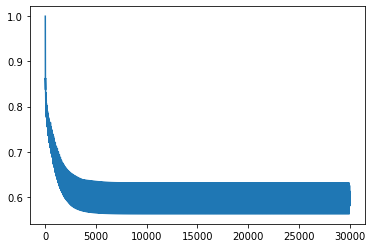

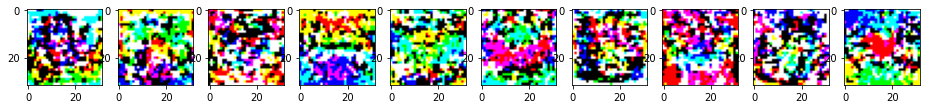

x_train -> (50000, 3072)
train_acc =  0.8623377777777778
train_loss =  0.5964346652836968
x_test -> (10000, 3072)
test_acc =  0.7772555555555556
test_loss =  0.7433258738073459


In [6]:
plt.plot(loss_history)
f, axarr = plt.subplots(1,10)
f.set_size_inches(16, 6)

for i in range(10):
    img = w1[:, i].reshape(32, 32, 3) # CIFAR10
    #img = w1[:, i].reshape(28, 28) # MNIST
    axarr[i].imshow(img*100000)
plt.show()

x_t = x_train
print("x_train ->", x_t.shape)
h = 1.0/(1.0 + np.exp(-(x_t.dot(w1) + b1))) #sigmoid
y_pred = h.dot(w2) + b2
train_acc = 1.0 -1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred, axis=1))).sum()
train_loss = 1/(Ntr)*np.square(y_train - y_pred).sum()
print("train_acc = ", train_acc)
print("train_loss = ", train_loss)

x_t = x_test
print("x_test ->", x_t.shape)
h = 1.0/(1.0 + np.exp(-(x_t.dot(w1) + b1))) #sigmoid
y_pred= h.dot(w2) + b2
test_acc = 1.0 - 1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred, axis=1))).sum()
test_loss = 1/(Nte)*np.square(y_test - y_pred).sum()
print("test_acc = ", test_acc)
print("test_loss = ", test_loss)